<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/3rdWeekTask/MaterialStrength_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Membaca dataset dari file CSV
data = pd.read_csv('sample_data/MaterialStrength.csv')

In [47]:
# Melakukan encoding pada kolom kategorikal ('x14', 'x15')
label_encoder_x14 = LabelEncoder()
label_encoder_x15 = LabelEncoder()

data['x14'] = label_encoder_x14.fit_transform(data['x14'].astype(str))
data['x15'] = label_encoder_x15.fit_transform(data['x15'].astype(str))


In [48]:
# Menyiapkan fitur (X) dan target (y)
X = data.drop(columns=['target_feature'])
y = data['target_feature']


In [49]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Inisialisasi model Decision Tree
decision_tree = DecisionTreeRegressor()

In [51]:
# **Regresi Linear Biasa**
linear_reg = LinearRegression()

In [52]:
# Melatih model dengan data latih
decision_tree.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)  # Melatih model Regresi Linear Biasa

LinearRegression()

In [53]:
# **Regresi Linear dengan Basis Fungsi (Polynomial Regression)**
poly_features = PolynomialFeatures(degree=2)  # Mengubah fitur untuk Polynomial Regression
X_train_poly = poly_features.fit_transform(X_train)  # Transformasi fitur
X_test_poly = poly_features.transform(X_test)

In [54]:
# Membuat dan melatih model regresi dengan basis fungsi
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train)  # Melatih model Regresi Polynomial

LinearRegression()

In [55]:
# Prediksi dengan masing-masing model
y_pred_tree = decision_tree.predict(X_test)  # Prediksi menggunakan Decision Tree
y_pred_linear = linear_reg.predict(X_test)  # Prediksi Regresi Linear Biasa
y_pred_poly = linear_reg_poly.predict(X_test_poly)  # Prediksi Regresi Polynomial


In [56]:
# Fungsi untuk mencetak metrik evaluasi model
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)  # Menghitung MSE
    rmse = np.sqrt(mse)  # Menghitung RMSE
    mae = mean_absolute_error(y_true, y_pred)  # Menghitung MAE
    r_squared = r2_score(y_true, y_pred)  # Menghitung R-squared

    print(f"Hasil {model_name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r_squared}")
    print("-" * 30)

In [57]:
# Mencetak metrik evaluasi untuk semua model
print_metrics(y_test, y_pred_tree, "Decision Tree")
print_metrics(y_test, y_pred_linear, "Regresi Linear Biasa")  # Hasil untuk Regresi Linear Biasa
print_metrics(y_test, y_pred_poly, "Regresi Polynomial")  # Hasil untuk Regresi Polynomial

Hasil Decision Tree:
MSE: 23.74921359223301
RMSE: 4.8733164880020885
MAE: 2.337864077669903
R-squared: 0.9078333598714092
------------------------------
Hasil Regresi Linear Biasa:
MSE: 75.4674986230397
RMSE: 8.687203153089014
MAE: 6.919559075838647
R-squared: 0.7071235323232181
------------------------------
Hasil Regresi Polynomial:
MSE: 34.68604618016109
RMSE: 5.889486070970972
MAE: 4.662042987883282
R-squared: 0.8653893812797192
------------------------------


In [58]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

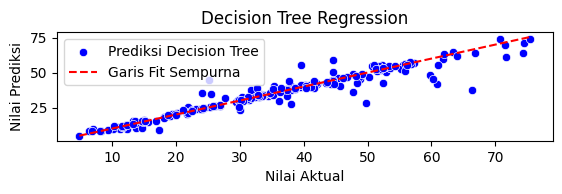

In [59]:
# Plot untuk Decision Tree Regression
plt.subplot(3, 1, 1)
sns.scatterplot(x=y_test, y=y_pred_tree, color='blue', label='Prediksi Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Garis Fit Sempurna')
plt.title('Decision Tree Regression')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()

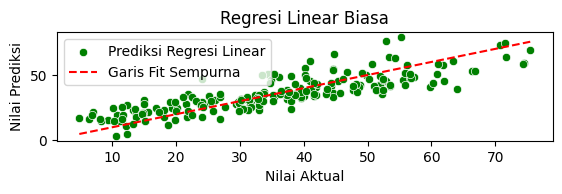

In [60]:
# Plot untuk Regresi Linear Biasa
plt.subplot(3, 1, 2)
sns.scatterplot(x=y_test, y=y_pred_linear, color='green', label='Prediksi Regresi Linear')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Garis Fit Sempurna')
plt.title('Regresi Linear Biasa')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()

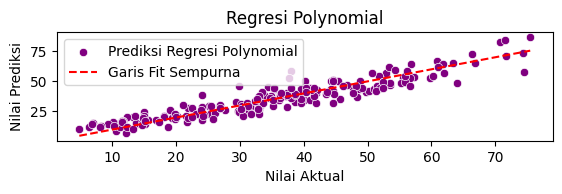

In [61]:
# Plot untuk Regresi Polynomial
plt.subplot(3, 1, 3)
sns.scatterplot(x=y_test, y=y_pred_poly, color='purple', label='Prediksi Regresi Polynomial')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Garis Fit Sempurna')
plt.title('Regresi Polynomial')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()

